https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html


### Tuning Cascade Classifiers

*ourClassifier*.**detectMultiScale**(input image, **Scale Factor** , **Min Neighbors**)

- **Scale Factor**
Specifies how much we reduce the image size each time we scale. E.g. in face detection we typically use 1.3. This means we reduce the image by 30% each time it’s scaled. Smaller values, like 1.05 will take longer to compute, but will increase the rate of detection.



- **Min Neighbors**
Specifies the number of neighbors each potential window should have in order to consider it a positive detection. Typically set between 3-6.
It acts as sensitivity setting, low values will sometimes detect multiples faces over a single face. High values will ensure less false positives, but you may miss some faces.  


In [ ]:
#!pip install opencv-python

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

<>:19: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:19: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/folders/2n/328p6qts2wn0bhrdj87s273c0000gn/T/ipykernel_14303/829300899.py:19: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


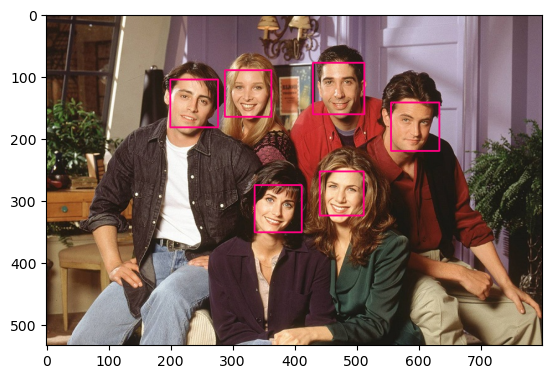

In [ ]:
# 使用預先訓練的 Haar 級聯模型來偵測影像中的臉部和眼睛
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

#測試不同的圖(全臉，側臉，被遮蔽的臉，非人臉...)
#image = cv2.imread('imgs/obama.jpg')
#image = cv2.imread('imgs/Trump.jpg')
image = cv2.imread('team.jpg')
#image = cv2.imread('imgs/monkey2.jpg')

#轉灰階
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 分類器將偵測到的人臉的 ROI 作為tuple傳回
# 會儲存左上角座標和右下角座標
# 1.3是縮放倍率，可參考官網說明，會影響到精確度
faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No faces found")

#可偵測所有臉
for (x,y,w,h) in faces:
    #cv2.rectangle(image, (x,y), (x+w,y+h), (127,0,255), 2)
    cv2.rectangle(image, (x,y), (x+w,y+h), (127,0,255),2)

#cv2.imshow('Face Detection', image)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
cv2.waitKey(0)

cv2.destroyAllWindows()

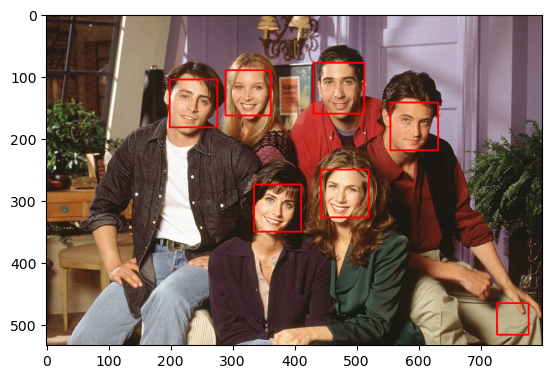

In [ ]:

# load the photograph
pixels = cv2.imread('imgs/team.jpg')
# load the pre-trained model
classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
# perform face detection
bboxes = classifier.detectMultiScale(pixels)
# print bounding box for each detected face
for box in bboxes:
	# extract
	x, y, width, height = box
	x2, y2 = x + width, y + height
	# draw a rectangle over the pixels
	cv2.rectangle(pixels, (x, y), (x2, y2), (0,0,255), 2)
# show the image
#cv2.imshow('face detection', pixels)
plt.imshow(cv2.cvtColor(pixels, cv2.COLOR_BGR2RGB))
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

### Let's combine face and eye detection

In [ ]:
import numpy as np
import cv2

face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades +
                                        'haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier(cv2.data.haarcascades +
                                       'haarcascade_eye.xml')

img = cv2.imread('imgs/team.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No Face Found")

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)

    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)

#cv2.imshow('img',img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()